**DRIVE MOUNT**

In [ ]:
#Mounting Google Drive in Colab notebook
from google.colab import drive
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import datetime
import pytz

london_timezone = pytz.timezone('Europe/London')
current_time_london = datetime.datetime.now(london_timezone)
print("Current Date and Time in London:", current_time_london.strftime("%Y-%m-%d %H:%M:%S %Z"))

Current Date and Time in London: 2023-12-06 16:14:25 GMT


**LIBRARY IMPORTS**

In [ ]:
from numpy.random import seed

# Ignore specific warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Importing Basic Libaries for Data Load and Image Movement
import os
import pandas as pd
import numpy as np
import itertools
import shutil

#Tensorflow libraries
import tensorflow
tensorflow.random.set_seed(101)

#libraries to build neural network models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,GlobalAveragePooling2D
from keras import backend as k

from keras.utils import to_categorical
from keras import optimizers
from keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.utils import img_to_array,array_to_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger
from tensorflow.keras import regularizers

#Model Libraries:
from keras.applications import ResNet152V2
from tensorflow.keras.applications.resnet_v2  import preprocess_input

#Split and Importing evaluation libraries
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix, roc_curve, auc,classification_report,balanced_accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

#Plotting Graphs:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**DIRECTORIES CREATION**

In [ ]:
# Creating new directory for file movement:
skin_res_base_dir = 'skin_res_base_dir'
os.mkdir(skin_res_base_dir)

In [ ]:
# Generate a pathway leading to the 'skin_res_base_dir' to which we will append the names of the new folders
# Training Directory creation
train_dir = os.path.join(skin_res_base_dir, 'train_dir')
os.mkdir(train_dir)

# Validation Directory creation
val_dir = os.path.join(skin_res_base_dir, 'val_dir')
os.mkdir(val_dir)

# Test Directory creation
test_dir = os.path.join(skin_res_base_dir, 'test_dir')
os.mkdir(test_dir)

In [ ]:
# Creation of new folders inside Training Directory
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)

In [ ]:
# Creation of new folders inside Validation Directory
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)

In [ ]:
# Creation of new folders inside Test Directory
nv = os.path.join(test_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(test_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(test_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(test_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(test_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(test_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(test_dir, 'df')
os.mkdir(df)

**DATA LOAD AND ANALYSIS**

In [ ]:
#Read metadata information of HAM10000 dataset
df_data = pd.read_csv('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/HAM10000_metadata')

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [ ]:
df_data.shape

(10015, 8)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [ ]:
#HAM1000 attributes basic analysis
print('unique lesion_id records:' ,df_data.lesion_id.nunique())
print('unique image_id records:' ,df_data.image_id.nunique())
print('unique dx records:' ,df_data.dx.nunique())
print('unique dx_type records:' ,df_data.dx_type.nunique())
print('unique  age records:' ,df_data.age.nunique())
print('unique  sex records:' ,df_data.sex.nunique())
print('unique  localization records:' ,df_data.localization.nunique())
print('unique   dataset records:' ,df_data. dataset.nunique())

unique lesion_id records: 7470
unique image_id records: 10015
unique dx records: 7
unique dx_type records: 4
unique  age records: 18
unique  sex records: 3
unique  localization records: 15
unique   dataset records: 4


In [ ]:
#HAM10000 dataset value counts
column_list=['dx','dx_type','age','sex','localization','dataset']
for column in column_list:
    print(f"Value counts for '{column}':")
    print(df_data[column].value_counts())
    print("\n")

Value counts for 'dx':
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


Value counts for 'dx_type':
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64


Value counts for 'age':
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: age, dtype: int64


Value counts for 'sex':
male       5406
female     4552
unknown      57
Name: sex, dtype: int64


Value counts for 'localization':
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  

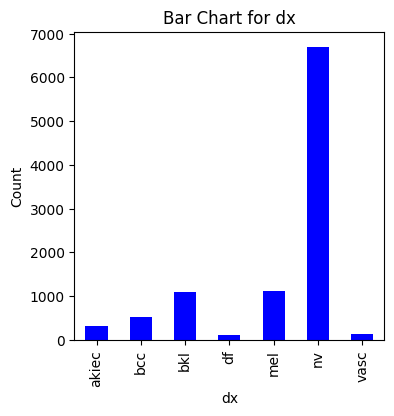

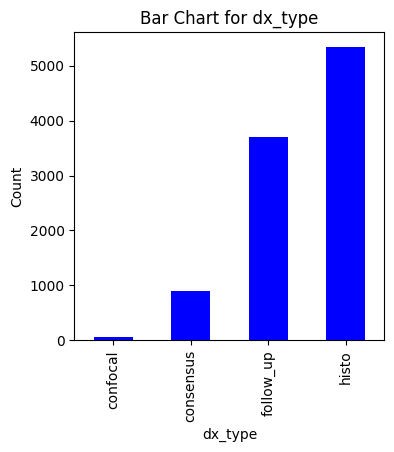

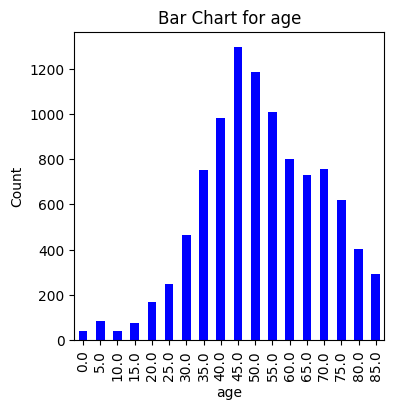

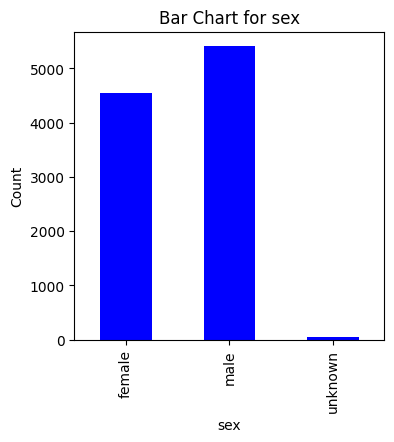

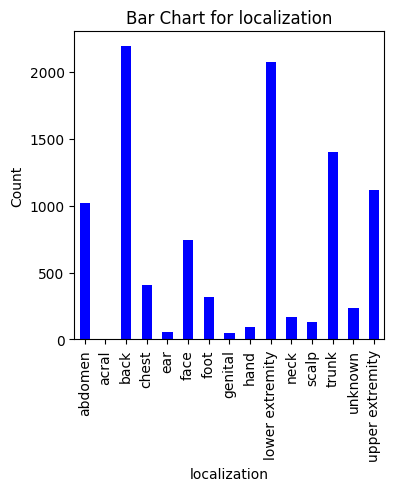

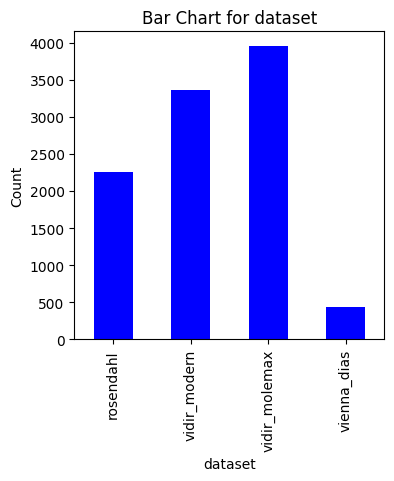

In [ ]:
# HAM10000 dataset visualization of variables
for column in column_list:
    plt.figure(figsize=(4, 4))
    df_data[column].value_counts().sort_index().plot(kind='bar', color='blue')
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [ ]:
#Sorting the dataset based on Lesion_Id
df_data = df_data.sort_values(by='lesion_id')

In [ ]:
'''import pandas as pd
from sklearn.model_selection import train_test_split'''

'import pandas as pd\nfrom sklearn.model_selection import train_test_split'

In [ ]:
# Train , Test and Validation Split Ratio
train_ratio = 0.7  # 70% of the data for training
test_ratio = 0.15  # 15% of the data for testing
val_ratio = 0.15   # 15% of the data for validation

In [ ]:
# Split the DataFrame into train, test, and validation dataframes
df_train, test_val_df = train_test_split(df_data, test_size=(test_ratio + val_ratio), random_state=42)
df_test, df_val = train_test_split(test_val_df, test_size=(val_ratio / (test_ratio + val_ratio)), random_state=42)


In [ ]:
#Length of Data Frame
print('Length of df_train:',len(df_train))
print('Length of df_val:',len(df_val))
print('Length of df_test:',len(df_test))

Length of df_train: 7010
Length of df_val: 1503
Length of df_test: 1502


In [ ]:
#Training set unique class values
df_train['dx'].value_counts()

nv       4647
bkl       799
mel       790
bcc       362
akiec     228
vasc      100
df         84
Name: dx, dtype: int64

In [ ]:
#Validation set unique class values
df_val['dx'].value_counts()

nv       1015
mel       182
bkl       151
bcc        70
akiec      54
vasc       18
df         13
Name: dx, dtype: int64

In [ ]:
#Test set unique class values
df_test['dx'].value_counts()

nv       1043
bkl       149
mel       141
bcc        82
akiec      45
vasc       24
df         18
Name: dx, dtype: int64

**IMAGES COPY FROM SOURCE TO DESTINATION**

In [ ]:
# Get a list of images from HAM folder in Google Drive
folder = os.listdir('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES')

# Get a list of train ,test and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])
test_list = list(df_test['image_id'])

In [ ]:
#Moving the images from google dir to train_dir
for image in train_list:

    fname = image + '.jpg'
    #label = df_data.loc[image,'dx']
    label=df_data.loc[df_data['image_id'] == image, 'dx'].values[0]


    if fname in folder:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
#Moving the images from google dir to val_dir
for image in val_list:

    fname = image + '.jpg'
    #label = df_data.loc[image,'dx']
    label=df_data.loc[df_data['image_id'] == image, 'dx'].values[0]

    if fname in folder:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
#Moving the images from google dir to test_dir
for image in test_list:

    fname = image + '.jpg'
    #label = df_data.loc[image,'dx']
    label=df_data.loc[df_data['image_id'] == image, 'dx'].values[0]

    if fname in folder:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES', fname)
        # destination path to image
        dst = os.path.join(test_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
# Determine the count of training images present in each directory.

print('nv:',len(os.listdir('skin_res_base_dir/train_dir/nv')))
print('mel:',len(os.listdir('skin_res_base_dir/train_dir/mel')))
print('bkl:',len(os.listdir('skin_res_base_dir/train_dir/bkl')))
print('bcc:',len(os.listdir('skin_res_base_dir/train_dir/bcc')))
print('akiec:',len(os.listdir('skin_res_base_dir/train_dir/akiec')))
print('vasc:',len(os.listdir('skin_res_base_dir/train_dir/vasc')))
print('df:',len(os.listdir('skin_res_base_dir/train_dir/df')))

nv: 4647
mel: 790
bkl: 799
bcc: 362
akiec: 228
vasc: 100
df: 84


In [ ]:
# Determine the count of val images present in each directory.

print('nv:',len(os.listdir('skin_res_base_dir/val_dir/nv')))
print('mel:',len(os.listdir('skin_res_base_dir/val_dir/mel')))
print('bkl:',len(os.listdir('skin_res_base_dir/val_dir/bkl')))
print('bcc:',len(os.listdir('skin_res_base_dir/val_dir/bcc')))
print('akiec:',len(os.listdir('skin_res_base_dir/val_dir/akiec')))
print('vasc:',len(os.listdir('skin_res_base_dir/val_dir/vasc')))
print('df:',len(os.listdir('skin_res_base_dir/val_dir/df')))

nv: 1015
mel: 182
bkl: 151
bcc: 70
akiec: 54
vasc: 18
df: 13


In [ ]:
# Check how many test images we have in each folder.

print('nv:',len(os.listdir('skin_res_base_dir/test_dir/nv')))
print('mel:',len(os.listdir('skin_res_base_dir/test_dir/mel')))
print('bkl:',len(os.listdir('skin_res_base_dir/test_dir/bkl')))
print('bcc:',len(os.listdir('skin_res_base_dir/test_dir/bcc')))
print('akiec:',len(os.listdir('skin_res_base_dir/test_dir/akiec')))
print('vasc:',len(os.listdir('skin_res_base_dir/test_dir/vasc')))
print('df:',len(os.listdir('skin_res_base_dir/test_dir/df')))

nv: 1043
mel: 141
bkl: 149
bcc: 82
akiec: 45
vasc: 24
df: 18


**IMAGE GENERATOR STEPS**

In [ ]:
#Prepare for Generator steps

train_path = 'skin_res_base_dir/train_dir'
valid_path = 'skin_res_base_dir/val_dir'
test_path='skin_res_base_dir/test_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
num_test_samples = len(df_test)
train_batch_size = 10
val_batch_size = 10
test_batch_size = 10

image_size = 224

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)
test_steps = np.ceil(num_test_samples / test_batch_size)

In [ ]:
#Data Generator Preprocessing and creating train,test and validation batches
datagen = ImageDataGenerator(
    preprocessing_function= \
    tensorflow.keras.applications.resnet_v2.preprocess_input)

train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=train_batch_size,class_mode='categorical')

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=val_batch_size,class_mode='categorical')

test_batches = datagen.flow_from_directory(test_path,
                                            target_size=(image_size,image_size),
                                            batch_size=test_batch_size,
                                            shuffle=False,class_mode='categorical')

Found 7010 images belonging to 7 classes.
Found 1503 images belonging to 7 classes.
Found 1502 images belonging to 7 classes.


**MODEL BUILDING**

In [ ]:
#Model Building with image size 224(Pre Trained on Imagenet)
resnet_model = Sequential()
pretrained_model=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

#Pre Trained Model Freezing
for layer in pretrained_model.layers:
        layer.trainable=False

#Add customization to the models
resnet_model.add(pretrained_model)
resnet_model.add(GlobalAveragePooling2D())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

234545216/234545216 [==============================] - 7s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                                 
Total params: 58594823 (223.52 MB)
Trainable params: 263175 (1.00 MB)
Non-trainable params: 58331648 (222.52 MB)
_________________________________________________________________


In [ ]:
#Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Early stopping and Check points

early_stop = EarlyStopping(monitor='val_loss', patience=1,verbose=1,mode='auto', restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/SKIN_CANCER_RESNET_152V2_Base_Model.h5', monitor='val_accuracy', save_best_only=True)

callbacks_list = [checkpoint, early_stop]

In [ ]:
#Train the model
history=resnet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=50,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/50
701/701 [==============================] - 100s 120ms/step - loss: 0.9611 - accuracy: 0.6874 - val_loss: 0.8583 - val_accuracy: 0.6966
Epoch 2/50
701/701 [==============================] - 78s 112ms/step - loss: 0.8124 - accuracy: 0.7107 - val_loss: 0.8213 - val_accuracy: 0.7033
Epoch 3/50
701/701 [==============================] - 78s 111ms/step - loss: 0.7729 - accuracy: 0.7297 - val_loss: 0.8345 - val_accuracy: 0.6933
Epoch 3: early stopping


**MODEL EVALUATION**

In [ ]:
# Evaluate the model and generate a confusion matrix for Test
test_batches.shuffle = False
predictions = resnet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 16s 91ms/step


In [ ]:
#Generate Confusion Matrix and Classification Report for Test Inages
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  0  11  24   0   0  10   0]
 [  0  39  25   0   0  18   0]
 [  0  19  85   0  12  33   0]
 [  0   9   2   0   0   7   0]
 [  0  18  33   0  17  73   0]
 [  0  33  32   0  24 954   0]
 [  0   9   2   0   0  11   2]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.00      0.00      0.00        45
         bcc       0.28      0.48      0.35        82
         bkl       0.42      0.57      0.48       149
          df       0.00      0.00      0.00        18
         mel       0.32      0.12      0.18       141
          nv       0.86      0.91      0.89      1043
        vasc       1.00      0.08      0.15        24

    accuracy                           0.73      1502
   macro avg       0.41      0.31      0.29      1502
weighted avg       0.70      0.73      0.70      1502



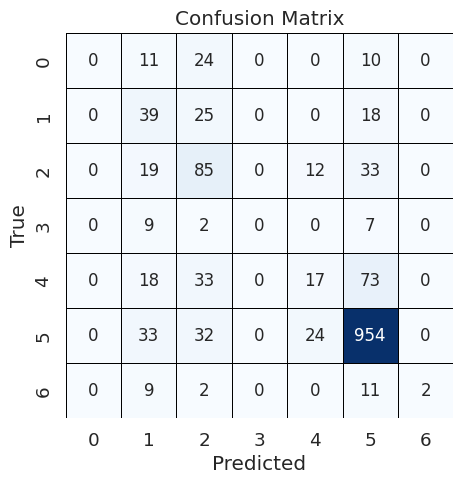

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

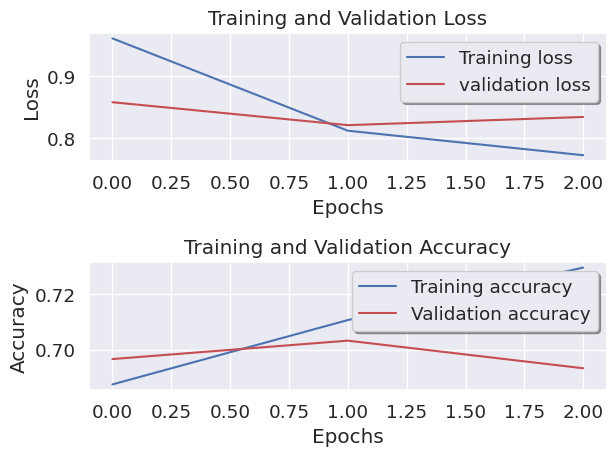

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
#Assigning Loss and Accuracy Values to varaibles
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

In [ ]:
#Printing Train and Test Accuracy
print('train_loss:',train_loss)
print('train_accuracy:',train_accuracy)
print('val_loss:',val_loss)
print('val_accuracy:',val_accuracy)

train_loss: 0.7729454636573792
train_accuracy: 0.7296718955039978
val_loss: 0.8345244526863098
val_accuracy: 0.6932801008224487


In [ ]:
# Load the model weights
resnet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/SKIN_CANCER_RESNET_152V2_Base_Model.h5')

# Generate predictions
predictions = resnet_model.predict(test_batches)

# Convert true labels to one-hot encoded format
true_labels = np.array(test_batches.labels)
print(true_labels)
label_binarizer = LabelBinarizer()
print(label_binarizer)
true_labels = label_binarizer.fit_transform(true_labels)
print(true_labels)

# Calculate ROC AUC scores
roc_auc_scores = roc_auc_score(true_labels, predictions, average='macro')

151/151 [==============================] - 13s 87ms/step
[0 0 0 ... 6 6 6]
LabelBinarizer()
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


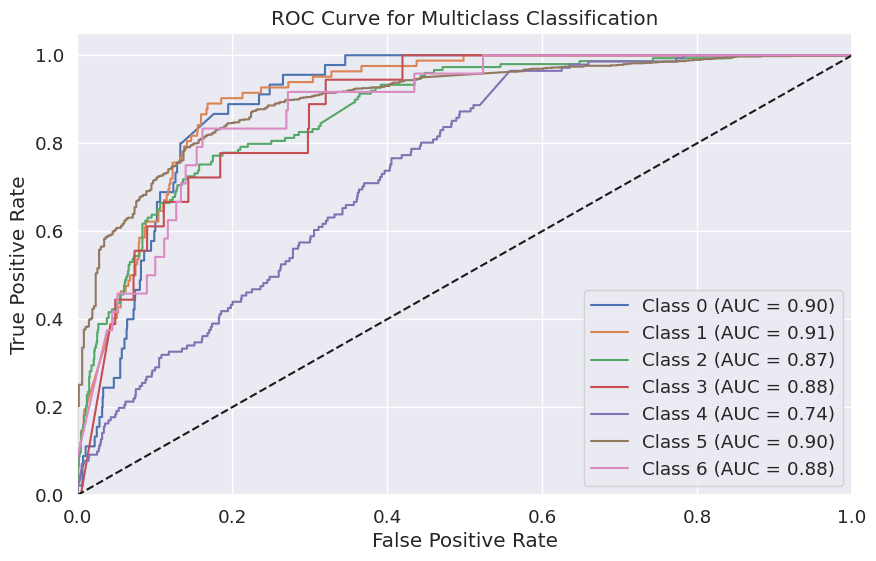

In [ ]:
#ROC AUC curve for the Skin Classification
num_classes = 7
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 6))

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import datetime
import pytz

london_timezone = pytz.timezone('Europe/London')
current_time_london = datetime.datetime.now(london_timezone)
print("Current Date and Time in London:", current_time_london.strftime("%Y-%m-%d %H:%M:%S %Z"))

Current Date and Time in London: 2023-12-06 16:25:40 GMT
